In [ ]:
# What I am experimenting with here?
# I am using trying multiple pertubation to find what excites the most (Attribution)
# Averaging the multiple areas to find the specfic objects the NN is looking for
# Comparing that with the OOD Data 

# Based on Ruth C. Fong, Mandela Patrick and Andrea Vedaldi, Understanding Deep Networks via Extremal Perturbations and Smooth Masks, ICCV 2019

In [ ]:
!pip install torchray

245
extremal_perturbation:
- target: 285
- areas: [0.05]
- variant: preserve
- max_iter: 500
- step/sigma: 7, 21
- image size: [1, 3, 224, 224]
- reward function: contrastive_reward
- Perturbation:
  - type: blur
  - num_levels: 8
  - pyramid shape: [8, 3, 224, 224]
- mask resolution:
  torch.Size([1, 1, 32, 32])
[0001/0500] [area:0.05 loss:-10.53 reg:-262.99]


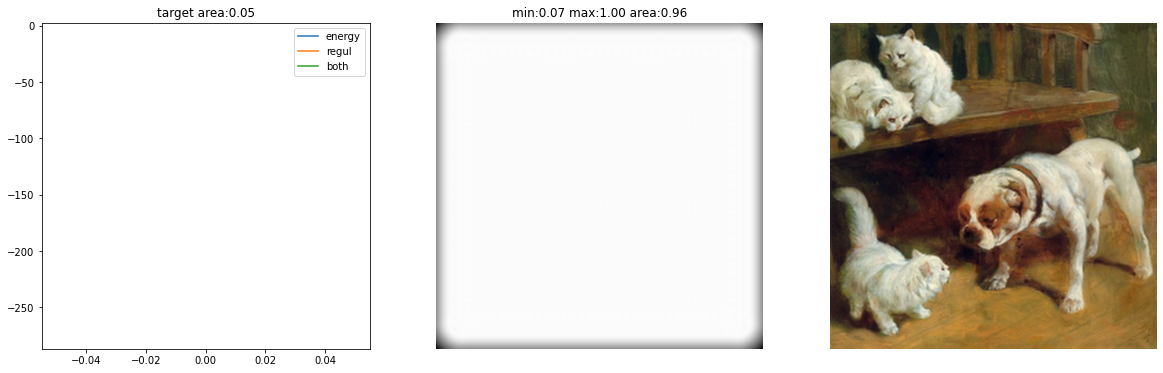

[0200/0500] [area:0.05 loss:-0.72 reg:-27.66]


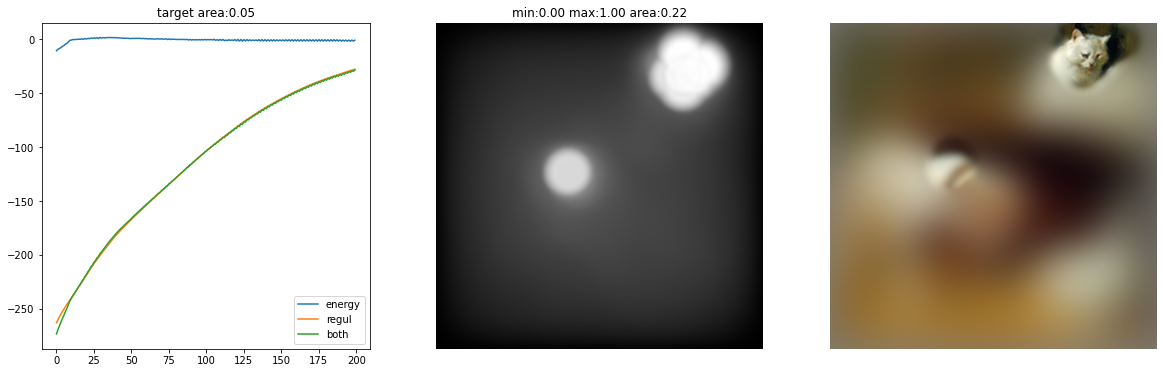

[0399/0500] [area:0.05 loss:-2.89 reg:-12.43]


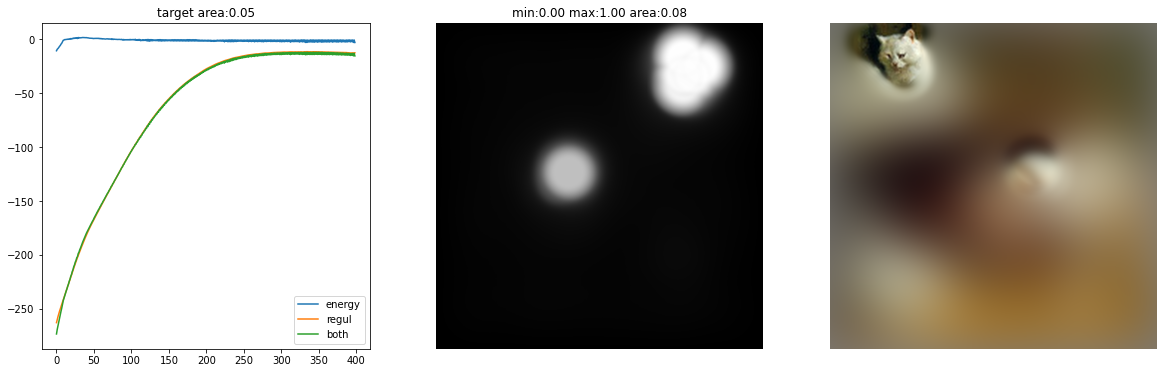

[0500/0500] [area:0.05 loss:-0.49 reg:-17.09]


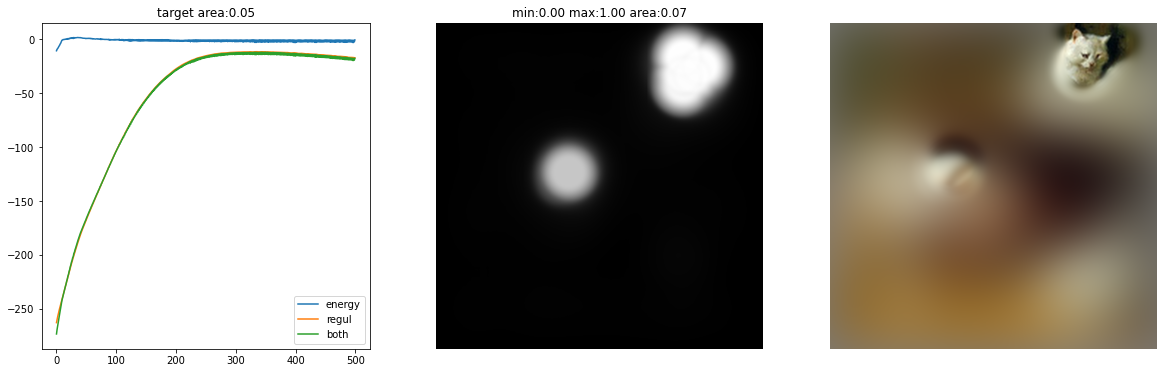

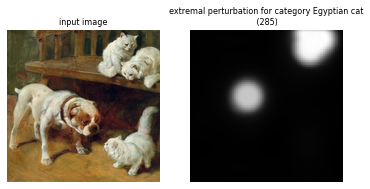

In [330]:
from torchray.attribution.extremal_perturbation import extremal_perturbation, contrastive_reward
from torchray.benchmark import get_example_data, plot_example
from torchray.utils import get_device

# Obtain example data.
model, x, category_id_1, category_id_2 = get_example_data()

# Run on GPU if available.
device = get_device()
model.to(device)
x = x.to(device)

print(category_id_1)
# Extremal perturbation backprop.
masks_1, _ = extremal_perturbation(
    model, x, category_id_2,
    reward_func=contrastive_reward,
    perturbation="blur",
    debug=True,
    areas=[0.05],
    smooth=0.01,
    max_iter=500
)

# masks_2, _ = extremal_perturbation(
#     model, x, category_id_2,
#     reward_func=contrastive_reward,
#     debug=True,
#     areas=[0.05],
# )

# Plots.
plot_example(x, masks_1, 'extremal perturbation', category_id_2)
# plot_example(x, masks_2, 'extremal perturbation', category_id_2)

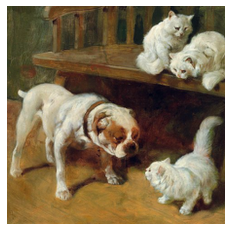

In [331]:
from torchray.utils import imarraysc

_,pic =imarraysc(x)
pic.figure.savefig("x.png")

In [ ]:
## Crop Important Area

In [352]:
dat=torch.round(masks_1)[0][0].cpu().detach().numpy()
x = x
# argwhere will give you the coordinates of every non-zero point
true_points = np.argwhere(dat)
# take the smallest points and use them as the top left of your crop
top_left = true_points.min(axis=0)
print(top_left)
# take the largest points and use them as the bottom right of your crop
bottom_right = true_points.max(axis=0)
print(bottom_right)
out = x[:,:,top_left[0]:bottom_right[0],  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]]  # inclusive


[ 0 65]
[117 211]


[[[[-0.5081771  -0.4739276  -0.5081771  ... -0.67942464 -0.45680285
    -0.7650484 ]
   [-0.4739276  -0.43967807 -0.4054286  ... -0.6622999  -0.6109256
    -0.7650484 ]
   [-0.37117907 -0.2855553  -0.23418105 ... -0.7479236  -0.7479236
    -0.8677969 ]
   ...
   [ 1.4097953   1.5467933   1.4782944  ...  0.09118938  0.1939379
     0.1939379 ]
   [ 1.5296686   1.5125438   1.42692    ...  0.41655967  0.5193082
     0.5535577 ]
   [ 1.5639181   1.4611696   1.3241715  ...  0.5878072   0.6563062
     0.57068247]]

  [[-0.897759   -0.862745   -0.897759   ... -0.670168   -0.460084
    -0.862745  ]
   [-0.880252   -0.827731   -0.792717   ... -0.65266097 -0.635154
    -0.862745  ]
   [-0.792717   -0.705182   -0.65266097 ... -0.757703   -0.792717
    -0.9502801 ]
   ...
   [ 1.3431373   1.4306723   1.3606442  ...  0.01260505  0.10014006
     0.08263306]
   [ 1.4656863   1.4131653   1.2906163  ...  0.3277312   0.4327732
     0.4677872 ]
   [ 1.5182073   1.3781513   1.2205883  ...  0.50280124  0.57

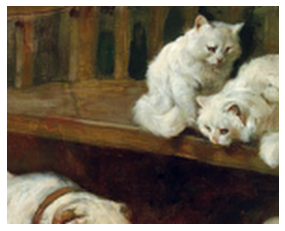

In [353]:
print(out)
_,pic =imarraysc(torch.tensor(out))
pic.figure.savefig("x.png")